In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/Women Dresses Reviews Dataset .csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [ ]:
df=df[['review_text','rating']].dropna()

In [ ]:
df

,review_text,rating
0,Like other reviewers i was hesitant to spend t...,5
1,As is true of a bunch of the fall clothing pho...,5
2,"I so wanted this skirt to work, love the desig...",1
3,Love love this! i was hesitant to buy this at ...,5
4,I absolutely love the retro look of this swims...,5
...,...,...
23481,I oot this dress in the blue. it fits great--h...,5
23482,I was very patient with this dress. i was wait...,5
23483,"The deep v doesn't gape, and flatters the neck...",5
23484,"I saw this dress online this morning, went int...",5


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,review_text,rating
0,Like other reviewers i was hesitant to spend t...,5
1,As is true of a bunch of the fall clothing pho...,5
2,"I so wanted this skirt to work, love the desig...",1
3,Love love this! i was hesitant to buy this at ...,5
4,I absolutely love the retro look of this swims...,5
...,...,...
22636,I oot this dress in the blue. it fits great--h...,5
22637,I was very patient with this dress. i was wait...,5
22638,"The deep v doesn't gape, and flatters the neck...",5
22639,"I saw this dress online this morning, went int...",5


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer

ps =PorterStemmer()
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
import seaborn as sns
def preprocess_text(text):
    review=re.sub("[^a-zA-Z]"," ",text)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review=" ".join(review)
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['cleaned_review'] = df['review_text'].apply(preprocess_text)

In [ ]:
df

,review_text,rating,cleaned_review
0,Like other reviewers i was hesitant to spend t...,5,like review hesit spend much pair jean howev p...
1,As is true of a bunch of the fall clothing pho...,5,true bunch fall cloth photo color total wash m...
2,"I so wanted this skirt to work, love the desig...",1,want skirt work love design way way long lb sm...
3,Love love this! i was hesitant to buy this at ...,5,love love hesit buy first review made seem big...
4,I absolutely love the retro look of this swims...,5,absolut love retro look swimsuit first saw blo...
...,...,...,...
22636,I oot this dress in the blue. it fits great--h...,5,oot dress blue fit great hit knee short awkwar...
22637,I was very patient with this dress. i was wait...,5,patient dress wait almost forev till dress get...
22638,"The deep v doesn't gape, and flatters the neck...",5,deep v gape flatter necklin waist high side sl...
22639,"I saw this dress online this morning, went int...",5,saw dress onlin morn went store afternoon walk...


sentiment
positive    17448
neutral      2823
negative     2370
Name: count, dtype: int64


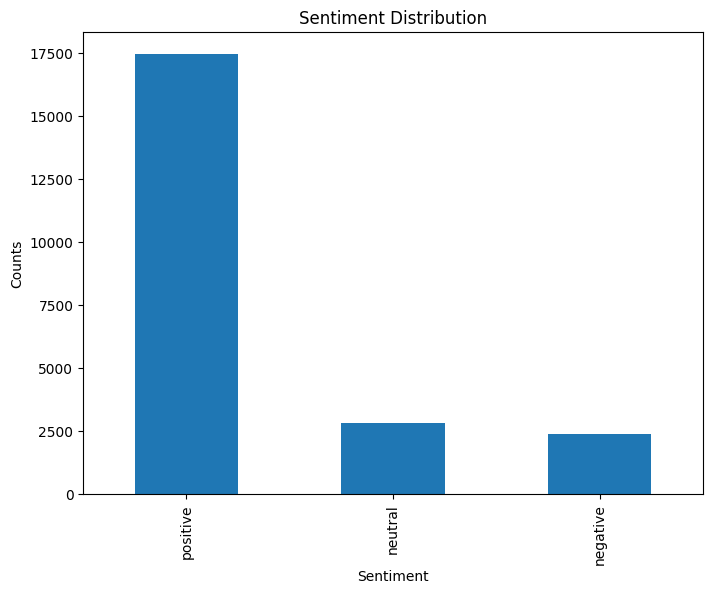

In [ ]:
# Function to calculate sentiment
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns the polarity

# Apply the function
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))
print(df['sentiment'].value_counts())

# Sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()
print()





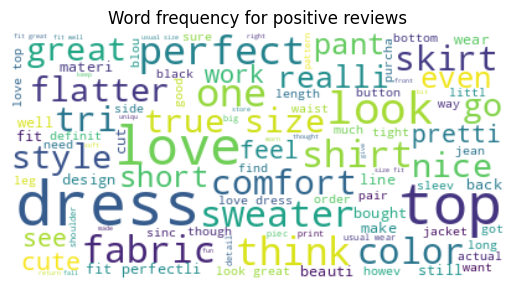

In [ ]:
# Word Cloud for Positive Sentiments
positive_reviews = ' '.join(text for text in df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word frequency for positive reviews')
plt.axis("off")
plt.show()
print()

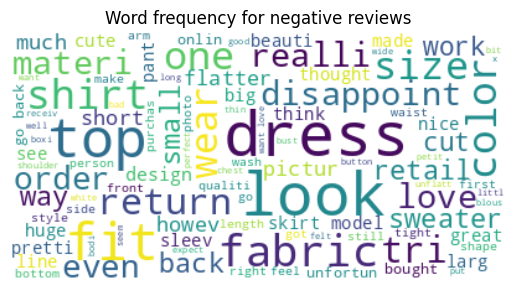

In [ ]:
# Word Cloud for Negative Sentiments
positive_reviews = ' '.join(text for text in df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word frequency for negative reviews')
plt.axis("off")
plt.show()